In [1]:
import numpy as np
from einops import rearrange
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

#https://www.thermofisher.com/uk/en/home/life-science/protein-biology/protein-biology-learning-center/protein-biology-resource-library/pierce-protein-methods/amino-acid-physical-properties.html
s = '''Amino Acid	Code	Hydropathy	Charge	pKa, NH2	pKa, COOH	pK(R)	Solubility
Arginine	R	hydrophilic	+	9.09	2.18	13.2	71.8
Asparagine	N	hydrophilic	N	8.8	2.02	 	2.4
Aspartate	D	hydrophilic	-	9.6	1.88	3.65	0.42
Glutamate	E	hydrophilic	-	9.67	2.19	4.25	0.72
Glutamine	Q	hydrophilic	N	9.13	2.17	 	2.6
Lysine	K	hydrophilic	+	10.28	8.9	2.2	 
Serine	S	hydrophilic	N	9.15	2.21	 	36.2
Threonine	T	hydrophilic	N	9.12	2.15	 	freely
Cysteine	C	moderate	N	10.78	1.71	8.33	freely
Histidine	H	moderate	+	8.97	1.78	6	4.19
Methionine	M	moderate	N	9.21	2.28	 	5.14
Alanine	A	hydrophobic	N	9.87	2.35	 	15.8
Valine	V	hydrophobic	N	9.72	2.29	 	5.6
Glycine	G	hydrophobic	N	9.6	2.34	 	22.5
Isoleucine	I	hydrophobic	N	9.76	2.32	 	3.36
Leucine	L	hydrophobic	N	9.6	2.36	 	2.37
Phenylalanine	F	hydrophobic	N	9.24	2.58	 	2.7
Proline	P	hydrophobic	N	10.6	1.99	 	1.54
Tryptophan	W	hydrophobic	N	9.39	2.38	 	1.06
Tyrosine	Y	hydrophobic	N	9.11	2.2	10.1	0.038
'''

aa_props = pd.DataFrame([i.split('\t') for i in s.splitlines()])
aa_props.columns = aa_props.iloc[0,:]
aa_props = aa_props.iloc[1:,:]
aa_props.index = aa_props['Code'].tolist()

aa_props['Charge'] = aa_props['Charge'].apply(lambda s : {'-':-1, 'N':0, '+':1}[s])
aa_props['Hydrophilicity'] = aa_props['Hydropathy'].apply(lambda s : {'hydrophilic':1, 'moderate':0.5, 'hydrophobic':0}[s])
aa_props['Solubility'] = aa_props['Solubility'].str.replace('freely','100')
aa_props = aa_props[['Hydrophilicity', 'Charge', 'pKa, NH2', 'pKa, COOH']].astype(float)
sx = MinMaxScaler()
aa_props_scaled = pd.DataFrame(sx.fit_transform(aa_props), columns=aa_props.columns, index=aa_props.index)
aa_props_scaled

,Hydrophilicity,Charge,"pKa, NH2","pKa, COOH"
R,1.0,1.0,0.146465,0.065369
N,1.0,0.5,0.000000,0.043115
D,1.0,0.0,0.404040,0.023644
E,1.0,0.0,0.439394,0.066759
Q,1.0,0.5,0.166667,0.063978
K,1.0,1.0,0.747475,1.000000
S,1.0,0.5,0.176768,0.069541
T,1.0,0.5,0.161616,0.061196
C,0.5,0.5,1.000000,0.000000
H,0.5,1.0,0.085859,0.009736


In [2]:
DICT = {'R': {'Hydrophilicity': 1.0,
  'Charge': 1.0,
  'pKa, NH2': 0.1464646464646462,
  'pKa, COOH': 0.06536856745479833},
 'N': {'Hydrophilicity': 1.0,
  'Charge': 0.5,
  'pKa, NH2': 0.0,
  'pKa, COOH': 0.04311543810848398},
 'D': {'Hydrophilicity': 1.0,
  'Charge': 0.0,
  'pKa, NH2': 0.404040404040404,
  'pKa, COOH': 0.023643949930458957},
 'E': {'Hydrophilicity': 1.0,
  'Charge': 0.0,
  'pKa, NH2': 0.43939393939393945,
  'pKa, COOH': 0.06675938803894296},
 'Q': {'Hydrophilicity': 1.0,
  'Charge': 0.5,
  'pKa, NH2': 0.16666666666666696,
  'pKa, COOH': 0.06397774687065369},
 'K': {'Hydrophilicity': 1.0,
  'Charge': 1.0,
  'pKa, NH2': 0.7474747474747474,
  'pKa, COOH': 1.0},
 'S': {'Hydrophilicity': 1.0,
  'Charge': 0.5,
  'pKa, NH2': 0.17676767676767646,
  'pKa, COOH': 0.06954102920723224},
 'T': {'Hydrophilicity': 1.0,
  'Charge': 0.5,
  'pKa, NH2': 0.16161616161616088,
  'pKa, COOH': 0.06119610570236436},
 'C': {'Hydrophilicity': 0.5,
  'Charge': 0.5,
  'pKa, NH2': 1.0,
  'pKa, COOH': 0.0},
 'H': {'Hydrophilicity': 0.5,
  'Charge': 1.0,
  'pKa, NH2': 0.08585858585858563,
  'pKa, COOH': 0.00973574408901251},
 'M': {'Hydrophilicity': 0.5,
  'Charge': 0.5,
  'pKa, NH2': 0.20707070707070674,
  'pKa, COOH': 0.07927677329624475},
 'A': {'Hydrophilicity': 0.0,
  'Charge': 0.5,
  'pKa, NH2': 0.5404040404040398,
  'pKa, COOH': 0.08901251738525731},
 'V': {'Hydrophilicity': 0.0,
  'Charge': 0.5,
  'pKa, NH2': 0.46464646464646453,
  'pKa, COOH': 0.08066759388038944},
 'G': {'Hydrophilicity': 0.0,
  'Charge': 0.5,
  'pKa, NH2': 0.404040404040404,
  'pKa, COOH': 0.08762169680111262},
 'I': {'Hydrophilicity': 0.0,
  'Charge': 0.5,
  'pKa, NH2': 0.4848484848484844,
  'pKa, COOH': 0.08484005563282335},
 'L': {'Hydrophilicity': 0.0,
  'Charge': 0.5,
  'pKa, NH2': 0.404040404040404,
  'pKa, COOH': 0.09040333796940189},
 'F': {'Hydrophilicity': 0.0,
  'Charge': 0.5,
  'pKa, NH2': 0.22222222222222232,
  'pKa, COOH': 0.12100139082058411},
 'P': {'Hydrophilicity': 0.0,
  'Charge': 0.5,
  'pKa, NH2': 0.9090909090909092,
  'pKa, COOH': 0.03894297635605007},
 'W': {'Hydrophilicity': 0.0,
  'Charge': 0.5,
  'pKa, NH2': 0.29797979797979757,
  'pKa, COOH': 0.09318497913769122},
 'Y': {'Hydrophilicity': 0.0,
  'Charge': 0.5,
  'pKa, NH2': 0.1565656565656557,
  'pKa, COOH': 0.06815020862308765}}

In [3]:
import numpy as np
from einops import rearrange
from sklearn.preprocessing import MinMaxScaler


def encode(gene, d=1):
    x = np.stack([list(DICT[i].values()) for i in gene])
    if d == 1:
        return rearrange(x, 'l c -> (l c)')
    elif d == 2:
        return x


encode('AGTNSS',1)

array([0.        , 0.5       , 0.54040404, 0.08901252, 0.        ,
       0.5       , 0.4040404 , 0.0876217 , 1.        , 0.5       ,
       0.16161616, 0.06119611, 1.        , 0.5       , 0.        ,
       0.04311544, 1.        , 0.5       , 0.17676768, 0.06954103,
       1.        , 0.5       , 0.17676768, 0.06954103])

In [4]:
df = pd.read_csv('experiment-a/all-scores-a.csv')
x = np.stack(df['gene'].apply(encode))
x.shape

(32791, 100)

In [5]:
%%time
from umap import UMAP
umap = UMAP()
x_ = umap.fit_transform(x)

/home/u0/miniconda3/envs/sxfst/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


CPU times: user 28min 28s, sys: 31.2 s, total: 28min 59s
Wall time: 4min 2s


In [6]:
x_.shape

(32791, 2)

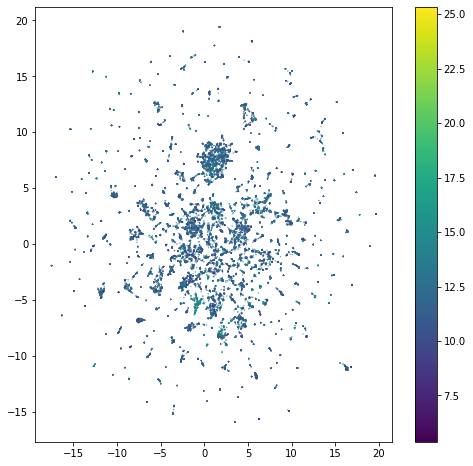

In [7]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8,8))
plt.scatter(x_[:,0], 
            x_[:,1],
            s=0.1,
            c=df.score,
            )

plt.colorbar()
plt.show()

In [8]:
df.columns

Index(['gene', 'aff_mean', 'dist_mean', 'score', 'ham', 'uid'], dtype='object')

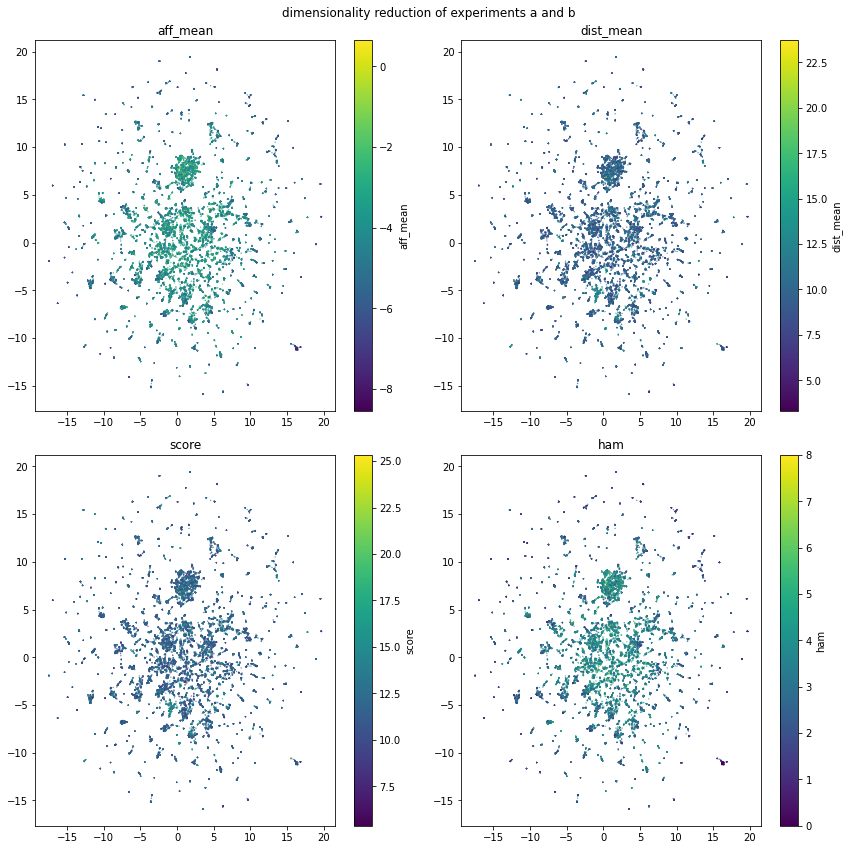

In [9]:
fig, ax = plt.subplots(2,2, figsize=(12,12))
for i, j in zip(ax.flatten(), 
                [ 'aff_mean', 'dist_mean', 'score', 'ham'],
                  ):
    point_size = lambda title : 0.5 if 't-sne' in title else 0.05
                        
    scatter = i.scatter(x_[:,0], 
                        x_[:,1],
                        s=0.1,
                        c=df[j],
                        )
                        
    i.set_title(j)
    fig.colorbar(mappable=scatter, ax=i, label=j)

fig.suptitle('dimensionality reduction of experiments a and b')
plt.tight_layout()
#plt.savefig('img/dimred-plt.png')
plt.show()

In [10]:
%%time
from sklearn.manifold import TSNE
tsne = TSNE()
x_t = tsne.fit_transform(x)

/home/u0/miniconda3/envs/sxfst/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/u0/miniconda3/envs/sxfst/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


CPU times: user 51min 26s, sys: 1min 5s, total: 52min 32s
Wall time: 6min 51s


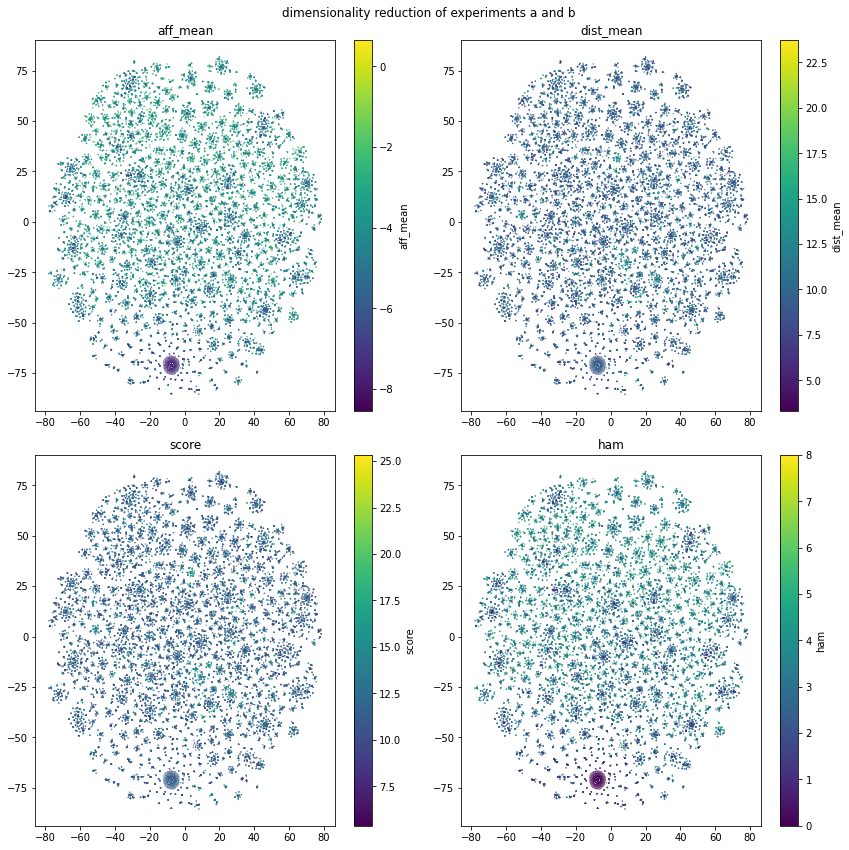

In [11]:
fig, ax = plt.subplots(2,2, figsize=(12,12))
for i, j in zip(ax.flatten(), 
                [ 'aff_mean', 'dist_mean', 'score', 'ham'],
                  ):
    point_size = lambda title : 0.5 if 't-sne' in title else 0.05
                        
    scatter = i.scatter(x_t[:,0], 
                        x_t[:,1],
                        s=0.1,
                        c=df[j],
                        )
                        
    i.set_title(j)
    fig.colorbar(mappable=scatter, ax=i, label=j)

fig.suptitle('dimensionality reduction of experiments a and b')
plt.tight_layout()
#plt.savefig('img/dimred-plt.png')
plt.show()